In [1]:

#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize


In [2]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

maxi=0

In [42]:
#@count=1
#while(count<100):
    #test and train dataset split

    df = pd.read_csv('Feature/feature_tt.csv')
    df['split'] = np.random.randn(df.shape[0], 1)

    msk = np.random.rand(len(df)) <= 0.7

    train = df[msk]
    test = df[~msk]

    x = train.drop("Level", axis=1)
    y = train["Level"]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)

    MLA = [
        #Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier(),

        #Gaussian Processes
        gaussian_process.GaussianProcessClassifier(),

        #GLM
        linear_model.LogisticRegressionCV(),
        linear_model.PassiveAggressiveClassifier(),
        linear_model. RidgeClassifierCV(),
        linear_model.SGDClassifier(),
        linear_model.Perceptron(),

        #Navies Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),

        #Nearest Neighbor
        neighbors.KNeighborsClassifier(),

        #SVM
        svm.SVC(probability=True),
        svm.NuSVC(probability=True),
        svm.LinearSVC(),

        #Trees    
        tree.DecisionTreeClassifier(),
       #tree.ExtraTreeClassifier(),

        xgb.XGBClassifier(),

        ]






    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)


    row_index = 0
    for alg in MLA:


        predicted = alg.fit(x_train, y_train).predict(x_test)
        #fp, tp, th = roc_curve(y_test, predicted)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
        MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
        #extra
        #if (round(alg.score(x_test, y_test), 4)>maxi):
         #   maxi=round(alg.score(x_test, y_test), 4)
          #  maxiname=MLA_name
        #extra
        #MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
        #MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
        #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)




        row_index+=1

    MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
    MLA_compare
    

,MLA Name,MLA Train Accuracy,MLA Test Accuracy
1,BaggingClassifier,1.0000,0.8621
3,GradientBoostingClassifier,1.0000,0.7586
2,ExtraTreesClassifier,1.0000,0.7241
12,GaussianNB,0.7500,0.7241
10,Perceptron,0.6905,0.7241
9,SGDClassifier,0.6310,0.6552
8,RidgeClassifierCV,0.8929,0.6552
13,KNeighborsClassifier,0.7381,0.6552
18,XGBClassifier,1.0000,0.6552
6,LogisticRegressionCV,0.8333,0.6552


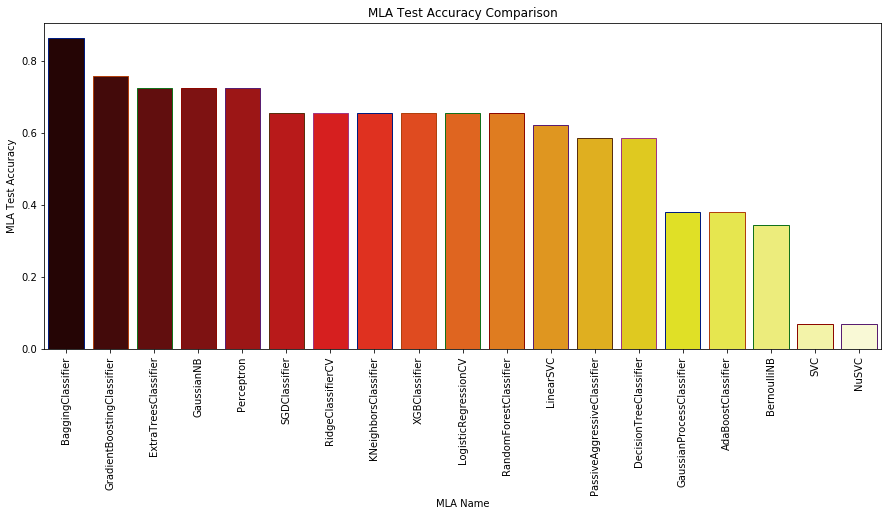

In [43]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

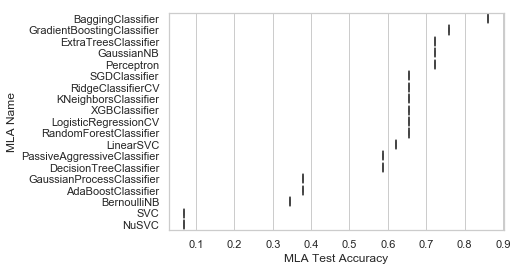

In [44]:
sns.set(style="whitegrid")
sns.boxplot(y="MLA Name", x="MLA Test Accuracy",data=MLA_compare)

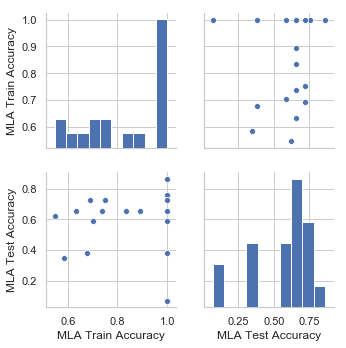

In [45]:
sns.set(style="whitegrid")
sns.pairplot(data=MLA_compare)

In [46]:
classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           1       0.20      0.50      0.29         2\n           2       0.50      0.43      0.46         7\n           3       1.00      0.67      0.80         9\n           4       0.75      0.82      0.78        11\n\n    accuracy                           0.66        29\n   macro avg       0.61      0.60      0.58        29\nweighted avg       0.73      0.66      0.68        29\n'

In [47]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [48]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

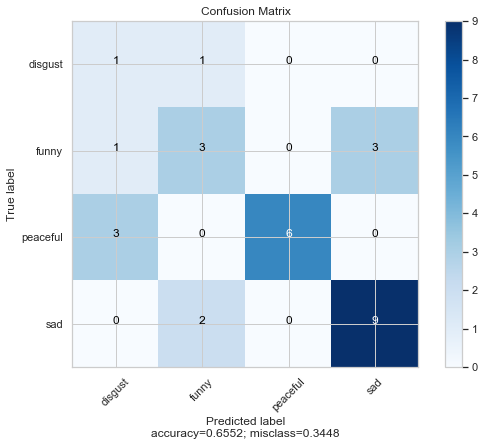

In [49]:
#not normalized
plot_confusion_matrix(cm           = confusion_matrix(y_test, predicted),
                      normalize    = False,
                      target_names = ['disgust', 'funny', 'peaceful', 'sad'],
                      title        = "Confusion Matrix")

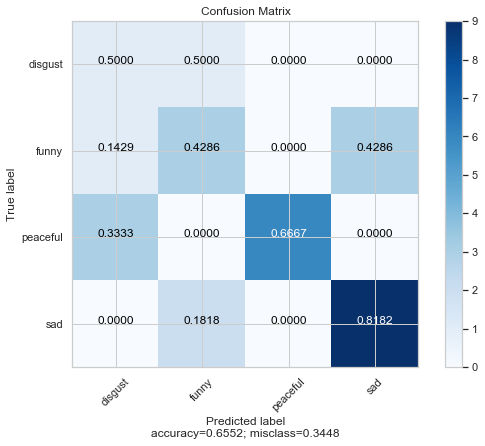

In [50]:
#normalized
plot_confusion_matrix(cm           = confusion_matrix(y_test, predicted),
                      normalize    = True,
                      target_names = ['disgust', 'funny', 'peaceful', 'sad'],
                      title        = "Confusion Matrix")

In [55]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import metrics

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission(Macro)'] = precision_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'MLA Precission(Micro)'] = precision_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'MLA Precission(Weighted)'] = precision_score(y_test, predicted, average="weighted")
    MLA_compare.loc[row_index, 'MLA Recall(macro)'] = recall_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'MLA Recall(micro)'] = recall_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'MLA Recall(weighted)'] = recall_score(y_test, predicted, average="weighted")
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    MLA_compare.loc[row_index, 'F1 Score(Macro)'] = metrics.f1_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'F1 Score(Micro)'] = metrics.f1_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'F1 Score(Weighted)'] = metrics.f1_score(y_test, predicted, average="weighted")



    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission(Macro),MLA Precission(Micro),MLA Precission(Weighted),MLA Recall(macro),MLA Recall(micro),MLA Recall(weighted),F1 Score(Macro),F1 Score(Micro),F1 Score(Weighted)
3,GradientBoostingClassifier,1.0000,0.7586,0.704212,0.758621,0.797524,0.697511,0.758621,0.758621,0.686905,0.758621,0.764368
12,GaussianNB,0.7500,0.7241,0.681250,0.724138,0.816379,0.674784,0.724138,0.724138,0.652381,0.724138,0.754023
10,Perceptron,0.6905,0.7241,0.683333,0.724138,0.781609,0.687771,0.724138,0.724138,0.666947,0.724138,0.735246
1,BaggingClassifier,0.9762,0.7241,0.673295,0.724138,0.788793,0.674784,0.724138,0.724138,0.654545,0.724138,0.742529
9,SGDClassifier,0.6548,0.6897,0.610119,0.689655,0.786125,0.575758,0.689655,0.689655,0.566155,0.689655,0.705636
16,LinearSVC,0.8214,0.6897,0.670833,0.689655,0.762644,0.728355,0.689655,0.689655,0.645652,0.689655,0.700300
8,RidgeClassifierCV,0.8929,0.6552,0.687179,0.655172,0.759859,0.713564,0.655172,0.655172,0.636905,0.655172,0.669951
13,KNeighborsClassifier,0.7381,0.6552,0.652244,0.655172,0.765473,0.603355,0.655172,0.655172,0.586364,0.655172,0.681661
18,XGBClassifier,1.0000,0.6552,0.612500,0.655172,0.729310,0.603355,0.655172,0.655172,0.582465,0.655172,0.676238
6,LogisticRegressionCV,0.8333,0.6552,0.568452,0.655172,0.711412,0.514069,0.655172,0.655172,0.536998,0.655172,0.678151
